<a href="https://colab.research.google.com/github/son50git/Routine-with-Python/blob/master/StackedBar_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
# side by side <- NEXT task

In [2]:
from google.colab import drive, files
drive.mount("/content/drive")
uploaded = files.upload()
rpt_name ="Routine_rpts_20201127_0006.xlsx"

Mounted at /content/drive


Saving Routine_rpts_20201127_0006.xlsx to Routine_rpts_20201127_0006.xlsx


In [6]:
def woe_and_scores(rpt_name): 

  sheet = "Daily_Output_Sup"
  woe_df = pd.read_excel(rpt_name, sheet_name=sheet)
  woe_df.drop(woe_df.tail(1).index,inplace=True) # drop the last row
  woe_df["woe"] = woe_df.WOE.rolling(7, 7).mean()
  woe_df["score"] = woe_df.SCORE.rolling(7, 7).mean()

  woe_df = woe_df.tail(21)

  woe_df.reset_index(inplace=True)
  woe_df.index = woe_df.index + 1
  woe_df = woe_df[["DATE","DAY","woe","score"]]

  # print(woe_df.tail(21))
  # print()

  fig, ax1 = plt.subplots()
  ax1.plot(woe_df["woe"], color='blue', linewidth=4)
  ax1.tick_params(axis='y', labelcolor='blue')
  ax2 = ax1.twinx() 
  woe_df["score"].plot(kind='bar', facecolor='.8', alpha=.5)

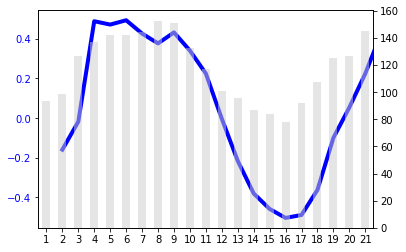

In [7]:
woe_and_scores(rpt_name)